In [25]:
# importing the packages to be used 

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


# reading the data 
df = pd.read_csv('/kaggle/input/movies/movies.csv')

In [26]:
# drop duplicated records and view data 
df.drop_duplicates()
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.40,"927,000.00",Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,"19,000,000.00","46,998,772.00",Warner Bros.,146.00
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.80,"65,000.00",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,"4,500,000.00","58,853,106.00",Columbia Pictures,104.00
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.70,"1,200,000.00",Irvin Kershner,Leigh Brackett,Mark Hamill,United States,"18,000,000.00","538,375,067.00",Lucasfilm,124.00
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.70,"221,000.00",Jim Abrahams,Jim Abrahams,Robert Hays,United States,"3,500,000.00","83,453,539.00",Paramount Pictures,88.00
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.30,"108,000.00",Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,"6,000,000.00","39,846,344.00",Orion Pictures,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.10,18.00,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,"7,000.00",NaN,NaN,90.00
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.70,36.00,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.00
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.70,29.00,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,"58,750.00",NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,"15,000.00",NaN,NaN,120.00


In [27]:
#checking dataset for nulls 

for col in df.columns:
    pct_missing = np.mean(df[col]. isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [28]:
# drop rows with nulls in either gross, budget, or score
df.dropna(subset=['gross','budget','score'], inplace=True)

In [29]:
# check the data types
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [30]:
#sort gross revenue column to see what movie has the highest revenue
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.80,"1,100,000.00",James Cameron,James Cameron,Sam Worthington,United States,"237,000,000.00","2,847,246,203.00",Twentieth Century Fox,162.00
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.40,"903,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"356,000,000.00","2,797,501,328.00",Marvel Studios,181.00
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.80,"1,100,000.00",James Cameron,James Cameron,Leonardo DiCaprio,United States,"200,000,000.00","2,201,647,264.00",Twentieth Century Fox,194.00
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.80,"876,000.00",J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,"245,000,000.00","2,069,521,700.00",Lucasfilm,138.00
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.40,"897,000.00",Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,"321,000,000.00","2,048,359,754.00",Marvel Studios,149.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.50,"1,900.00",Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,"5,000,000.00","2,970.00",Trimark Pictures,97.00
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.80,"43,000.00",John Fawcett,Karen Walton,Emily Perkins,Canada,"5,000,000.00","2,554.00",Copperheart Entertainment,108.00
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.90,"2,300.00",Charles Band,Alan J. Adler,Robert Glaudini,United States,"800,000.00","2,270.00",Embassy Pictures,85.00
2417,Madadayo,NaN,Drama,1993,"April 17, 1993 (Japan)",7.30,"5,100.00",Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,"11,900,000.00",596.00,DENTSU Music And Entertainment,134.00


In [31]:
# Top 10 companies for revenue

CompanyTotalRevenue = df.groupby('company')[['gross']].sum()
CompanyTotalRevenueTop10 = CompanyTotalRevenue.sort_values('gross', ascending = False)[:10]
CompanyTotalRevenueTop10 = CompanyTotalRevenueTop10['gross'].astype('int64')
CompanyTotalRevenueTop10

company
Warner Bros.             54773202654
Universal Pictures       51241105418
Columbia Pictures        42356430218
Paramount Pictures       40021704691
Twentieth Century Fox    39542573303
Walt Disney Pictures     35833650748
New Line Cinema          19628786232
Marvel Studios           15065592411
DreamWorks Animation     11873612858
Dreamworks Pictures      11593807697
Name: gross, dtype: int64

In [32]:
#calculate the median score, revenue for companies 
pd.options.display.float_format = '{:,.2f}'.format
df.groupby('company').agg(
    MedianScore = ('score','median'),
    MedianBudget = ('budget','median'),
    MedianGross = ('gross','median')).sort_values('MedianGross', ascending = False)[:10]

,MedianScore,MedianBudget,MedianGross
company,,,
Marvel Studios,7.55,"200,000,000.00","1,184,074,374.00"
Illumination Entertainment,6.35,"77,000,000.00","1,097,122,396.50"
Fairview Entertainment,7.40,"175,000,000.00","966,554,929.00"
B24,6.80,"245,000,000.00","880,681,519.00"
Avi Arad Productions,6.70,"100,000,000.00","856,085,151.00"
Chris Morgan Productions,6.40,"200,000,000.00","759,056,935.00"
Jolie Pas,7.00,"180,000,000.00","758,411,779.00"
Marvel Entertainment,7.70,"170,000,000.00","714,421,503.00"
Beijing Dengfeng International Culture Communications Company,6.00,"48,000,000.00","699,992,512.00"


<function matplotlib.pyplot.show(close=None, block=None)>

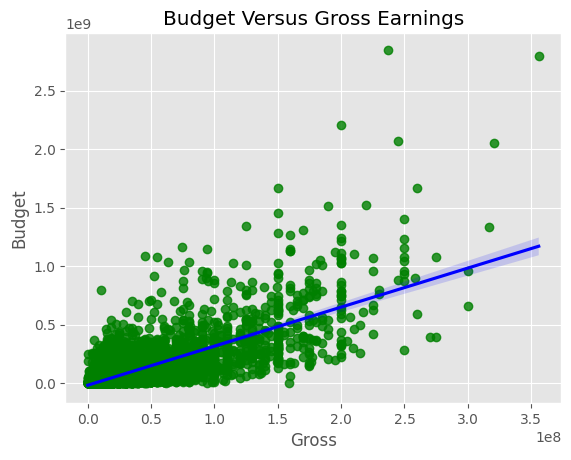

In [33]:
# Plot Budget vs gross on scatter with regression line

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "green"}, line_kws={"color":"blue"})
plt.title('Budget Versus Gross Earnings')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

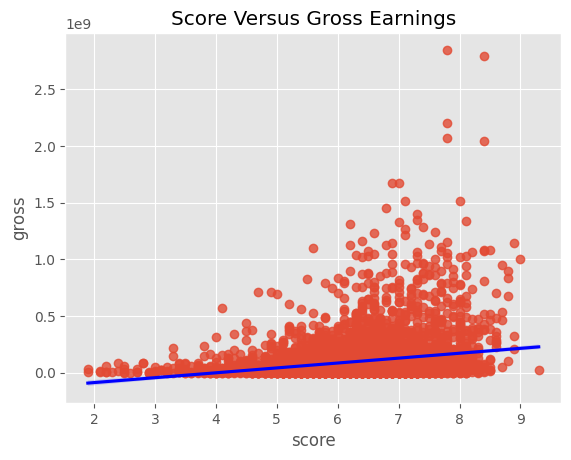

In [34]:
# Plot score vs gross revenue on scatter plot
sns.regplot(x='score', y='gross', data=df, line_kws={"color":"blue"})
plt.title('Score Versus Gross Earnings')
plt.show

In [35]:
# get correlation coefficients for numeric variables 
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.00,0.06,0.21,0.33,0.27,0.07
score,0.06,1.00,0.47,0.07,0.22,0.41
votes,0.21,0.47,1.00,0.44,0.61,0.35
budget,0.33,0.07,0.44,1.00,0.74,0.32
gross,0.27,0.22,0.61,0.74,1.00,0.28
runtime,0.07,0.41,0.35,0.32,0.28,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

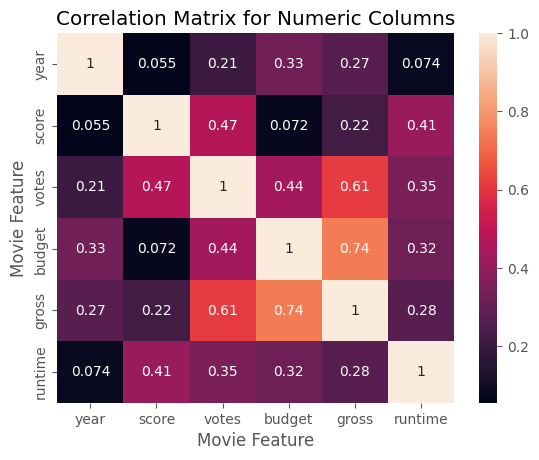

In [36]:
# Create Heat map to visualize correlations 
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Movie Feature')
plt.ylabel('Movie Feature')
           
plt.show

In [37]:
# Identify variables with highest correlations 
corr_pairs = correlation_matrix.unstack()
sorted_correlations = corr_pairs.sort_values()
sorted_correlations
high_correlations = sorted_correlations[((sorted_correlations) < 1) & ((sorted_correlations) > 0.4)]
high_correlations

runtime  score     0.41
score    runtime   0.41
votes    budget    0.44
budget   votes     0.44
votes    score     0.47
score    votes     0.47
gross    votes     0.61
votes    gross     0.61
budget   gross     0.74
gross    budget    0.74
dtype: float64

In [38]:
# create the x - independent variable and y - dependent for regression, predicting gross revenue with budget
X = df[['budget']]
Y = df['gross']

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
# Fitting the model
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [41]:
# Obtain model estimates
b0 = model.intercept_
b1 = model.coef_[0]
r_squared = model.score(X,Y)
print("Intecept = ", b0)
print("Coefficient = ", b1)
print("R_squared = ", r_squared)

Intecept =  -16825009.952970326
Coefficient =  3.3342796500711462
R_squared =  0.5481845975649076


In [42]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
# seeing how well the model works using other measures of error
Y_pred = model.predict(X) # predicting Y over X with the fitted model
print("R-squared:", r2_score(Y, Y_pred))
print("Mean Absolute Error:", mean_absolute_error(Y, Y_pred))
print("Mean Squared Error:", mean_squared_error(Y, Y_pred))
print("Root Mean Squared Error:", mean_squared_error(Y, Y_pred, squared=False))

R-squared: 0.5481845975649076
Mean Absolute Error: 67810925.05809236
Mean Squared Error: 1.581438922851194e+16
Root Mean Squared Error: 125755275.15182789


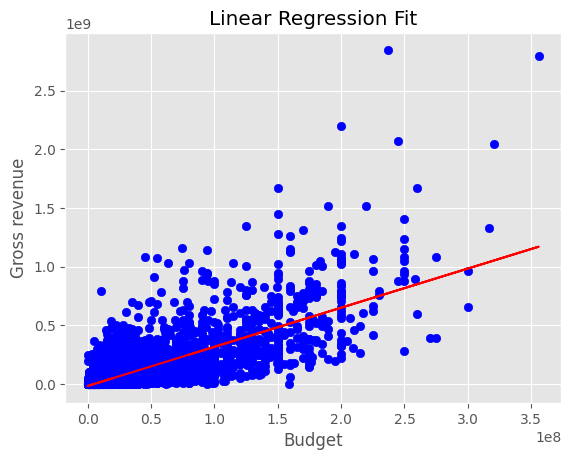

In [44]:
# predict gross income using model
Y_pred = model.predict(X)
plt.scatter(X,Y,color='blue')
plt.plot(X,Y_pred,color='red')
plt.title('Linear Regression Fit')
plt.xlabel('Budget')
plt.ylabel('Gross revenue')
plt.show()

In [45]:
# Define dependent variable (Y) and independent variables for mutiple regression
Y = df['gross']
X = df[['votes','budget']]

In [46]:
model.fit(X,Y) # fit model
print("Intercept(b0) = ",model.intercept_)
print("Coefficients([b1,b2]) = ",model.coef_)
print("R-squared = ",model.score(X,Y))

Intercept(b0) =  -33135390.844907388
Coefficients([b1,b2]) =  [364.13822987   2.62381524]
R-squared =  0.6518422201375684


In [47]:
# see if x variables are related, above 5 VIF usually correlation issue 
# import variance_inflation_factor module
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame that will store the VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns

# Calculating VIF for each variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

,Variable,VIF
0,votes,1.65
1,budget,1.65
